# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [36]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [37]:
import base64
with open("beach.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFQAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAMQJAAADoAQAAQAAAIMGAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDEzAP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIBoMJxAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAAAQIDBAUGB//EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEAMQAAAB7gPv5QGBBFoAAKwcJgJiGNA0KwYmAmA0wBMTGCaGDEmlkhgmAADEDTBDHFsTTBNAMEwAAaCGmKAgYCYCYhoYMiMEMAaAAAGACAGAAm4jAESQAhgADENA0AAAAhgDBAAmxACYDQAAAADQm0AIbQAAAxAxDQAyI0DAjIABDQAANAAAmOyLahoKUkCYgGhpgDQlJCYyIwTYRbQACGgGCABpiABDE0xMQADiwTBE0xMQxACYhggYgABAANAA0OLBMBA0iDqLAFJEZCRNoQ0IkgTQJoaaoHEBoASJyiIapNoSYyhgk0gBQhAAIapKSQTCLQgmqi2kQ0RbVgpQAGkAlZBMSBMrqg/P66bstFmC2ONPVFVk1ICUITCQAhqAxMRKLQwYACYAxAwVNoBo

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

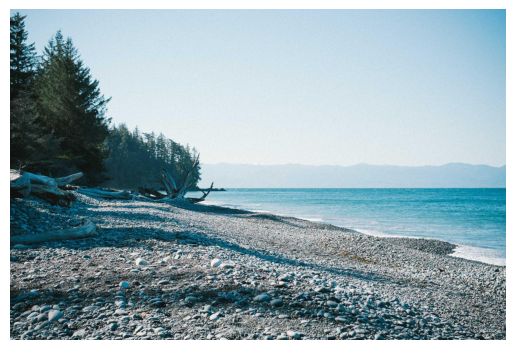

In [38]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

with open("image_data.txt", "r") as file:
    base64_image = file.read()

# Since the encoded base64 string is too long so i have made a text file and read content from it
# If you want to run on your pc just copy the printed string above and then paste below

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")


(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

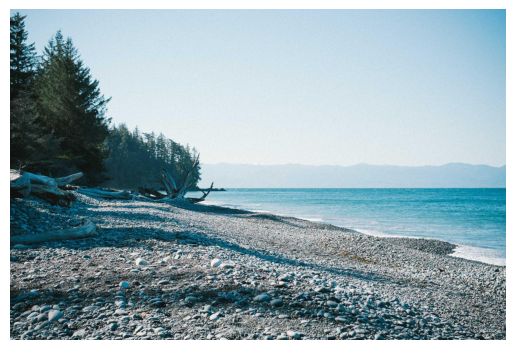

In [39]:
import cv2

# Convert the PIL Image to a NumPy array
img_np = np.array(img)

img_rgb = img_np
plt.imshow(img_rgb)
plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

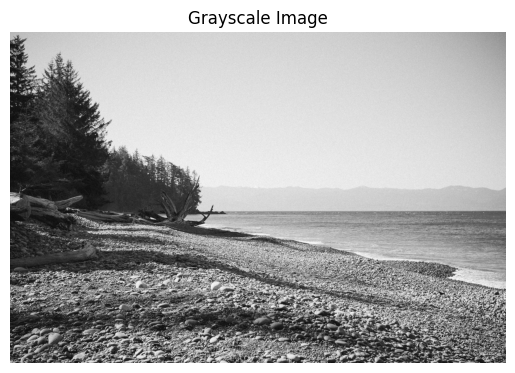

In [40]:
# Conversion to gray scale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.title("Grayscale Image")
plt.show

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [41]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [42]:
# Convert to float for math
gray_float = gray.astype(np.float32)

# fft
f = np.fft.fft2(gray_float)
fshift = np.fft.fftshift(f)

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [43]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [44]:
# Get image dimensions
rows, cols = gray.shape

# Calculate the center of the image
ccol, crow = cols // 2, rows // 2

radius_10 = 10

#LPF mask
mask_lpf_10 = np.zeros((rows, cols), np.uint8)

#circle of ones on the mask
cv2.circle(mask_lpf_10, (ccol, crow), radius_10, 1, -1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

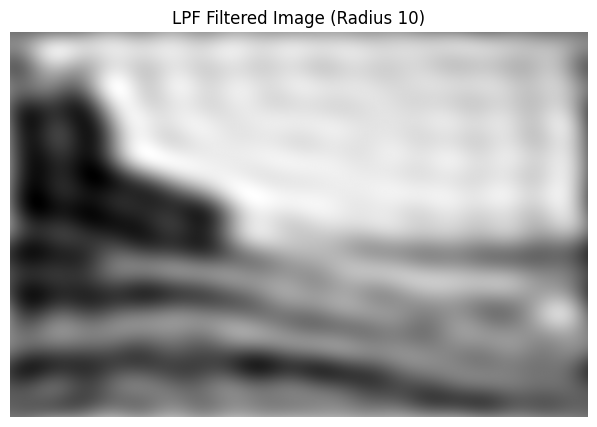

In [45]:
fshift_lpf_10 = fshift * mask_lpf_10
ishift_lpf_10 = np.fft.ifftshift(fshift_lpf_10)
img_back_lpf_10 = np.fft.ifft2(ishift_lpf_10)
img_back_lpf_10 = np.abs(img_back_lpf_10)

plt.figure(figsize=(10, 5))
plt.imshow(img_back_lpf_10, cmap='gray')
plt.title(f'LPF Filtered Image (Radius {radius_10})')
plt.axis('off')
plt.show()


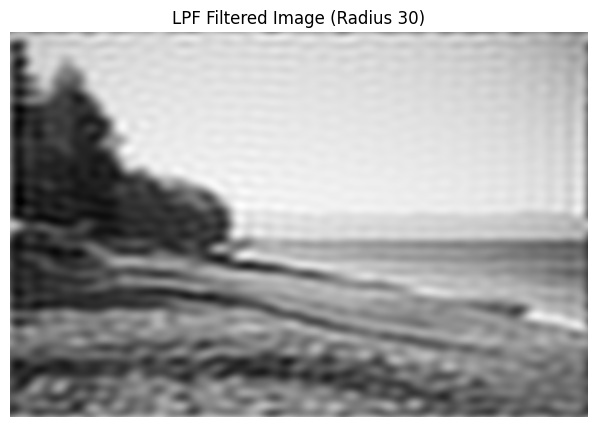

In [46]:
radius_30 = 30

#LPF mask
mask_lpf_30 = np.zeros((rows, cols), np.uint8)

#circle of ones on the mask
cv2.circle(mask_lpf_30, (ccol, crow), radius_30, 1, -1)

#Applying the mask to fshift
fshift_lpf_30 = fshift * mask_lpf_30

#inverse FFT shift
ishift_lpf_30 = np.fft.ifftshift(fshift_lpf_30)

# Applying inverse 2D FFT
img_back_lpf_30 = np.fft.ifft2(ishift_lpf_30)

img_back_lpf_30 = np.abs(img_back_lpf_30)

plt.figure(figsize=(10, 5))
plt.imshow(img_back_lpf_30, cmap='gray')
plt.title(f'LPF Filtered Image (Radius {radius_30})')
plt.axis('off')
plt.show()


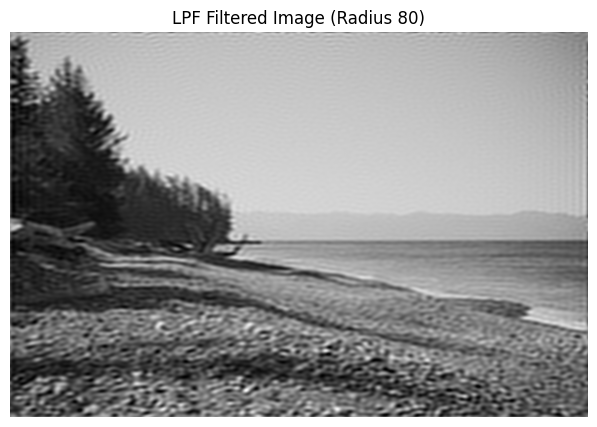

In [47]:
radius_80 = 80

#LPF mask
mask_lpf_80 = np.zeros((rows, cols), np.uint8)

#circle of ones on the mask
cv2.circle(mask_lpf_80, (ccol, crow), radius_80, 1, -1)

#Applying the mask to fshift
fshift_lpf_80 = fshift * mask_lpf_80

#inverse FFT shift
ishift_lpf_80 = np.fft.ifftshift(fshift_lpf_80)

#Applying inverse 2D FFT
img_back_lpf_80 = np.fft.ifft2(ishift_lpf_80)

img_back_lpf_80 = np.abs(img_back_lpf_80)

plt.figure(figsize=(10, 5))
plt.imshow(img_back_lpf_80, cmap='gray')
plt.title(f'LPF Filtered Image (Radius {radius_80})')
plt.axis('off')
plt.show()


***REASON***

In [48]:
# As the radius decreases, more high-frequency components are blocked, leading to a more blurred image.

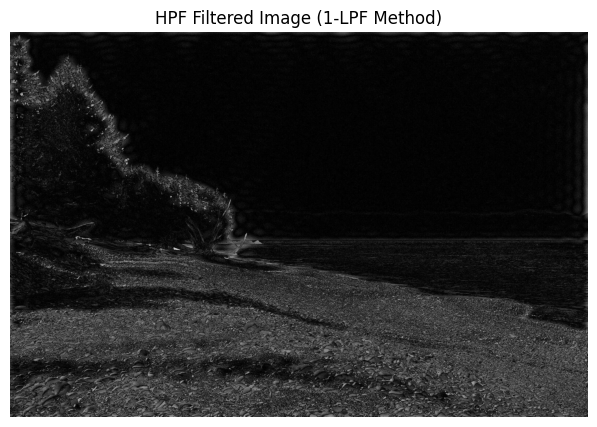

In [49]:
#HPF mask (1 - LPF mask)
mask_hpf = 1 - mask_lpf_30

#Applying the HPF mask to fshift
fshift_hpf = fshift * mask_hpf

#inverse FFT shift
ishift_hpf = np.fft.ifftshift(fshift_hpf)

#Applying inverse 2D FFT
img_back_hpf = np.fft.ifft2(ishift_hpf)

img_back_hpf = np.abs(img_back_hpf)

plt.figure(figsize=(10, 5))
plt.imshow(img_back_hpf, cmap='gray')
plt.title('HPF Filtered Image (1-LPF Method)')
plt.axis('off')
plt.show()

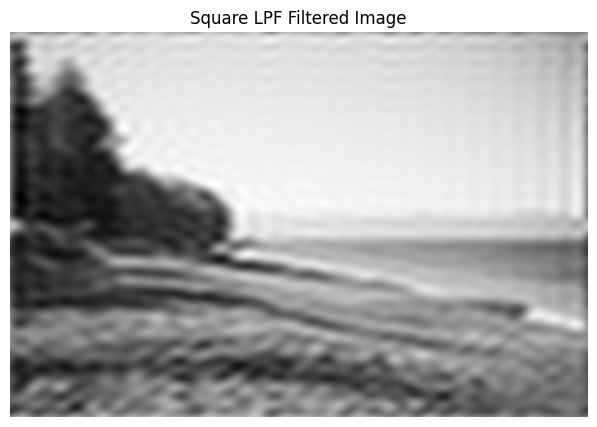

In [50]:
#square LPF mask
side_length = 50
mask_square_lpf = np.zeros((rows, cols), np.uint8)

#coordinates for the square
start_row, end_row = crow - side_length // 2, crow + side_length // 2
start_col, end_col = ccol - side_length // 2, ccol + side_length // 2

# Set the square region to 1
mask_square_lpf[start_row:end_row, start_col:end_col] = 1

# Apply the square LPF mask to fshift
fshift_square_lpf = fshift * mask_square_lpf

# Perform inverse FFT shift
ishift_square_lpf = np.fft.ifftshift(fshift_square_lpf)

# Apply inverse 2D FFT
img_back_square_lpf = np.fft.ifft2(ishift_square_lpf)

# Compute the absolute value to get the reconstructed image
img_back_square_lpf = np.abs(img_back_square_lpf)

plt.figure(figsize=(10, 5))
plt.imshow(img_back_square_lpf, cmap='gray')
plt.title('Square LPF Filtered Image')
plt.axis('off')
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

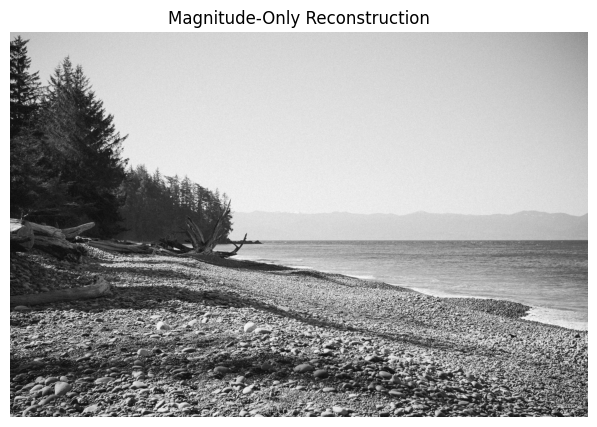

In [51]:
# Magnitude-only reconstruction
mag_only = np.abs(fshift)

# 1. With Zero Phase You keep the intensity (magnitude) but delete the location map (phase). Because the phase tells pixels where to go, the result is usually just a shapeless blob.

# 2. With Original Phase You combine the new intensity (magnitude) with the old location map (original phase). This keeps the image recognizable because the structure is preserved.

reconstructed_from_mag_complex = mag_only * np.exp(1j * np.angle(fshift))

ishift_mag_only = np.fft.ifftshift(reconstructed_from_mag_complex)
img_back_mag_only = np.fft.ifft2(ishift_mag_only)
img_back_mag_only = np.abs(img_back_mag_only)

plt.figure(figsize=(10, 5))
plt.imshow(img_back_mag_only, cmap='gray')
plt.title('Magnitude-Only Reconstruction')
plt.axis('off')
plt.show()

# 1. Why use Logarithm? The raw spectrum has massive peaks and tiny details. If you display it directly, the peaks drown everything else out. The logarithm shrinks the giants and boosts the small details so you can actually see the whole map.
# 2. Why Reconstruction != Spectrum
# The Spectrum is a map of frequencies (data about repeating patterns).
# The Reconstruction is the actual picture built back from that data. They look different because one is the "recipe" (frequency domain) and the other is the "cake" (spatial domain).

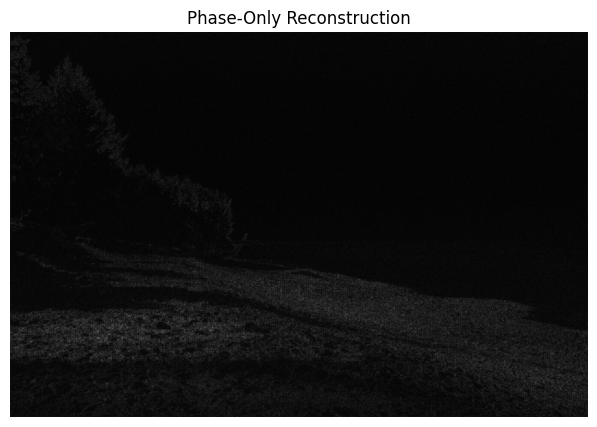

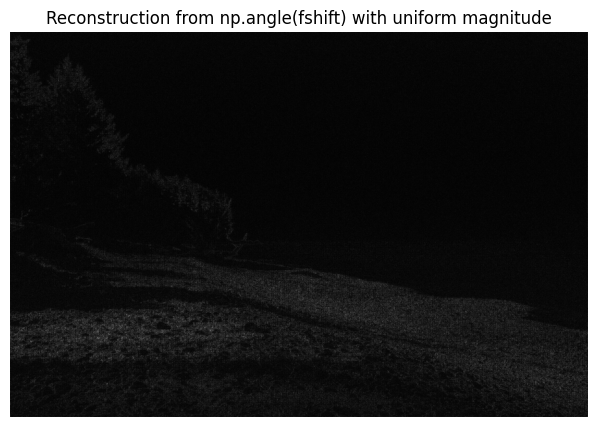

In [52]:
# Phase-only reconstruction
phase_only = fshift / np.abs(fshift)

# Perform inverse FFT shift
ishift_phase_only = np.fft.ifftshift(phase_only)

# Apply inverse 2D FFT
img_back_phase_only = np.fft.ifft2(ishift_phase_only)

# Compute the absolute value and display
img_back_phase_only = np.abs(img_back_phase_only)

plt.figure(figsize=(10, 5))
plt.imshow(img_back_phase_only, cmap='gray')
plt.title('Phase-Only Reconstruction')
plt.axis('off')
plt.show()

# 1. phase_only vs np.angle
# fshift / np.abs(fshift): Normalizes the complex numbers. It sets every value's magnitude to 1 but keeps the data in complex format (Real + Imaginary).
# np.angle(fshift): Extracts the phase angle as a single real number (radians). It discards the complex structure entirely.
# 2. Reconstruction from Angle You cannot run the Inverse FFT directly on the real-valued angles (np.angle). The IFFT requires complex input. To reconstruct, you must convert the angles back into complex numbers, typically by assigning them a uniform magnitude of 1.

reconstructed_from_angle_complex = np.exp(1j * np.angle(fshift))

ishift_angle_recon = np.fft.ifftshift(reconstructed_from_angle_complex)
img_back_angle_recon = np.fft.ifft2(ishift_angle_recon)
img_back_angle_recon = np.abs(img_back_angle_recon)

plt.figure(figsize=(10, 5))
plt.imshow(img_back_angle_recon, cmap='gray')
plt.title('Reconstruction from np.angle(fshift) with uniform magnitude')
plt.axis('off')
plt.show()

# Why the Phase-Only Image Looks Noisy: Reconstructing from phase alone (with uniform magnitude) results in a messy, edge-heavy image that lacks texture. This happens because magnitude controls how strong different patterns are (smoothness/shading), while phase only controls where they are (edges/shapes). Without the correct magnitude data, the structure exists, but the visual depth and clarity are lost.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

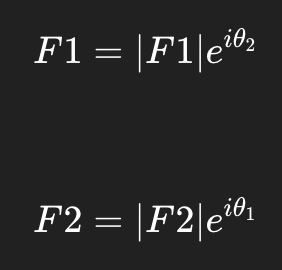

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [53]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.